In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pb=pd.read_csv("QVI_purchase_behaviour.csv")

In [4]:
pb.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [27]:
td=pd.read_excel("QVI_transaction_data.xlsx")

In [6]:
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
pb.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [8]:
td.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

# `CHECKING THE DATA TYPES`

In [9]:
pb.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [10]:
td.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

# `FINDING COUNT OF PRODUCTS`

In [43]:
pd.DataFrame(td.PROD_NAME.value_counts())

,PROD_NAME
Kettle Mozzarella Basil & Pesto 175g,3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
Tyrrells Crisps Ched & Chives 165g,3268
Cobs Popd Sea Salt Chips 110g,3265
...,...
RRD Pc Sea Salt 165g,1431
Woolworths Medium Salsa 300g,1430
NCC Sour Cream & Garden Chives 175g,1419
French Fries Potato Chips 175g,1418


# `CONVERTING DATATYPE`

In [32]:
td.DATE=pd.to_datetime(td.DATE,errors='ignore')

In [33]:
td.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

# `SUMMARIZATION`

In [11]:
pb.shape

(72637, 3)

In [12]:
td.shape

(264836, 8)

In [13]:
pb.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


`AS WE CAN SEE MEAN AND MEDIAN ARE ALMOST SIMILAR SO WE CAN CONCLUDE THAT THE DATA IS ALMOST NORMALLLY DISTRIBUTED`

<Axes: xlabel='LYLTY_CARD_NBR', ylabel='Density'>

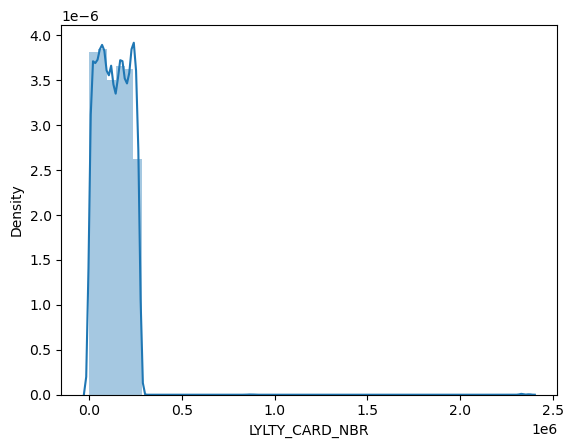

In [14]:
sns.distplot(pb['LYLTY_CARD_NBR'])

In [15]:
td.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


`AS WE CAN SEE THAT TOTAL SALES COLUMN HAS MAX VALUE OF 650 WHICH IS GREATER THAN DESIRED RANGE SO THERE ARE OUTLIERS PRESENT`

# `CHECKING FOR NULL VALUES`

In [16]:
td.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [17]:
pb.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

# `CLEANING THE OUTLIER`

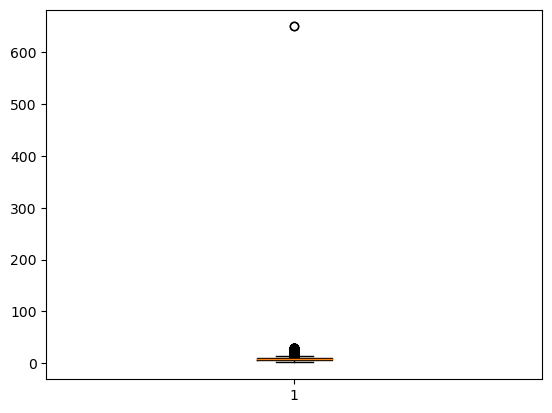

In [18]:
bp=plt.boxplot(td.TOT_SALES)

In [19]:
[x.get_ydata() for x in bp['whiskers']]

[array([5.4, 1.5]), array([ 9.2, 14.8])]

In [20]:
td_clean=td[td.TOT_SALES<14.8]

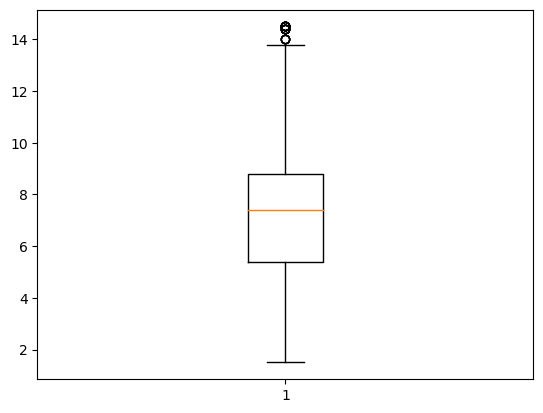

In [21]:
pb1=plt.boxplot(td_clean.TOT_SALES)

In [22]:
[x.get_ydata() for x in pb1['fliers']]

[array([14.5, 14.5, 14.5, 14.4, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14. ,
        14.5, 14. , 14.5, 14.4, 14.4, 14.4, 14.5, 14.4, 14.4, 14. , 14.5,
        14. , 14.5, 14.5, 14.5, 14.5, 14.5, 14. , 14.5, 14.4])]

In [23]:
td_clean[td_clean.TOT_SALES>13.8]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
137,43332,186,186401,188768,1,Smiths Crinkle Cut Chips Barbecue 170g,5,14.5
5055,43603,24,24060,20619,61,Smiths Crinkle Cut Chips Chicken 170g,5,14.5
17095,43332,164,164108,164461,8,Smiths Crinkle Cut Chips Original 170g,5,14.5
25135,43328,56,56161,50876,52,Grain Waves Sour Cream&Chives 210G,4,14.4
32551,43599,156,156018,156738,1,Smiths Crinkle Cut Chips Barbecue 170g,5,14.5
32670,43603,196,196102,196049,1,Smiths Crinkle Cut Chips Barbecue 170g,5,14.5
32762,43331,227,227046,228561,100,Smiths Crinkle Cut Chips Chs&Onion170g,5,14.5
32773,43601,230,230068,232345,100,Smiths Crinkle Cut Chips Chs&Onion170g,5,14.5
55270,43604,43,43047,38903,100,Smiths Crinkle Cut Chips Chs&Onion170g,5,14.5
55489,43327,156,156195,157931,61,Smiths Crinkle Cut Chips Chicken 170g,5,14.5


In [24]:
td_clean=td_clean[td_clean.TOT_SALES<13.8]

{'whiskers': [<matplotlib.lines.Line2D at 0x295774ff050>,
 'caps': [<matplotlib.lines.Line2D at 0x295774fdfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29576db3050>],
 'medians': [<matplotlib.lines.Line2D at 0x295774ffd50>],
 'fliers': [<matplotlib.lines.Line2D at 0x295774fe250>],
 'means': []}

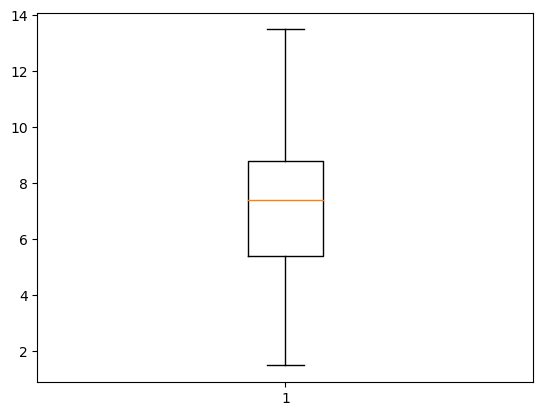

In [25]:
plt.boxplot(td_clean.TOT_SALES)

<Axes: xlabel='TOT_SALES', ylabel='Density'>

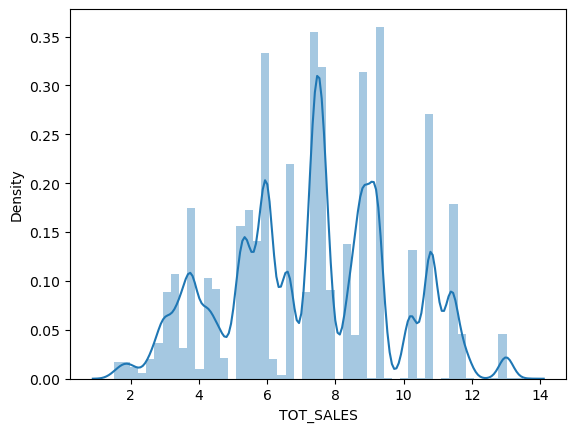

In [26]:
sns.distplot(td_clean.TOT_SALES)

`THE ABOVE DISTPLOT SHOWS THAT AFTER THE REMOVAL OF OUTLIERS OUR DATA IS NORMALLY DISTRIBUTED`